In [1]:
# Importing pandas
import pandas as pd

# Importing matplotlib and setting aesthetics for plotting later.
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
plt.style.use('fivethirtyeight')

# Reading in current data from coinmarketcap.com
current = pd.read_json("https://api.coinmarketcap.com/v1/ticker/")

# Printing out the first few lines
current.head()

,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,1.946730e+10,17772262,bitcoin,1561154967,176457411633,2.100000e+07,Bitcoin,-0.09,3.93,16.10,1.000000,9928.809942,1,BTC,17772262
1,9.042540e+09,106586483,ethereum,1561154957,31179582813,NaN,Ethereum,-0.20,7.34,11.93,0.029522,292.528488,2,ETH,106586483
2,1.451963e+09,42501950124,ripple,1561155005,18765580453,1.000000e+11,XRP,-0.03,2.59,9.95,0.000045,0.441523,3,XRP,99991601899
3,4.282198e+09,62330450,litecoin,1561155004,8558507900,8.400000e+07,Litecoin,0.05,1.32,4.10,0.013861,137.308616,4,LTC,62330450
4,1.793938e+09,17850625,bitcoin-cash,1561155005,7771889917,2.100000e+07,Bitcoin Cash,-0.08,4.92,5.26,0.043951,435.384751,5,BCH,17850625


The previous API call returns only the first 100 coins, and we want to explore as many coins as possible. Moreover, we can't produce reproducible analysis with live online data. To solve these problems, we will load a CSV saved on the 6th of December of 2017 using API call https://api.coinmarketcap.com/v1/ticker/?limit=0 named `datasets/coinmarket_cap_06122017.csv`.

In [3]:
# Reading datasets/coinmarketcap_06122017.csv into pandas
dec6 = pd.read_csv("datasets/coinmarketcap_06122017.csv")

# Selecting the 'id' and the 'market_cap_usd' columns
market_cap_raw = dec6[["id", "market_cap_usd"]]

# Counting the number of values
market_cap_raw.count()

id                1326
market_cap_usd    1031
dtype: int64

In [4]:
# Filtering out rows without a market capitalization
cap = market_cap_raw.query('market_cap_usd > 0')

# Counting the number of values again
cap.count()

id                1031
market_cap_usd    1031
dtype: int64

Text(0,0.5,'% of total cap')

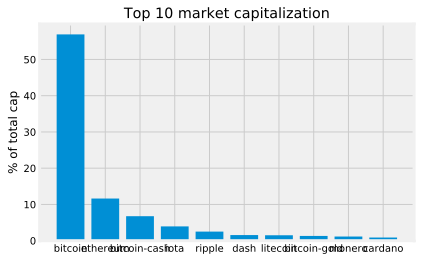

In [5]:
#Declaring these now for later use in the plots
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'

# Selecting the first 10 rows and setting the index
cap10 = cap.head(10).set_index('id')

# Calculating market_cap_perc
cap10 = cap10.assign(market_cap_perc = 
    lambda x: (x.market_cap_usd / cap.market_cap_usd.sum()) * 100)

# Plotting the barplot with the title defined above 
ax = plt.bar(cap10.index.values, cap10['market_cap_perc'])
plt.title(TOP_CAP_TITLE)

# Annotating the y axis with the label defined above
plt.ylabel(TOP_CAP_YLABEL)